<a href="https://colab.research.google.com/github/CrucifierBladex/stock_aapl/blob/main/AAPL_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

     |████████████████████████████████| 6.3MB 9.6MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=f66c49e4742da3cbf8c24c4f709a9194f3709a3497102775cc45201edeb6f6cd
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [4]:
import yfinance as yf
ticker_symbol='AAPL'
d=yf.Ticker(ticker_symbol)

In [6]:
df=d.history(period='1d',start='2010-5-31',end='2021-5-21')
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-01,7.975292,8.167235,7.952873,8.010303,876472800,0.0,0.0
2010-06-02,8.124240,8.132225,7.994947,8.106121,688548000,0.0,0.0
2010-06-03,8.143895,8.155258,7.997404,8.080631,650106800,0.0,0.0
2010-06-04,7.929839,8.043161,7.819895,7.860740,758304400,0.0,0.0
2010-06-07,7.932296,7.958707,7.694594,7.706572,886942000,0.0,0.0


In [10]:
df.reset_index(inplace=True)

In [11]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-01,7.975292,8.167235,7.952873,8.010303,876472800,0.0,0.0
1,2010-06-02,8.124240,8.132225,7.994947,8.106121,688548000,0.0,0.0
2,2010-06-03,8.143895,8.155258,7.997404,8.080631,650106800,0.0,0.0
3,2010-06-04,7.929839,8.043161,7.819895,7.860740,758304400,0.0,0.0
4,2010-06-07,7.932296,7.958707,7.694594,7.706572,886942000,0.0,0.0


In [12]:
stock_df=df[['Date','Close']]
stock_df.head()

,Date,Close
0,2010-06-01,8.010303
1,2010-06-02,8.106121
2,2010-06-03,8.080631
3,2010-06-04,7.860740
4,2010-06-07,7.706572


In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
plt.style.use('ggplot')


<Figure size 864x720 with 0 Axes>

Text(0.5, 1.0, 'Stock_AAPL')

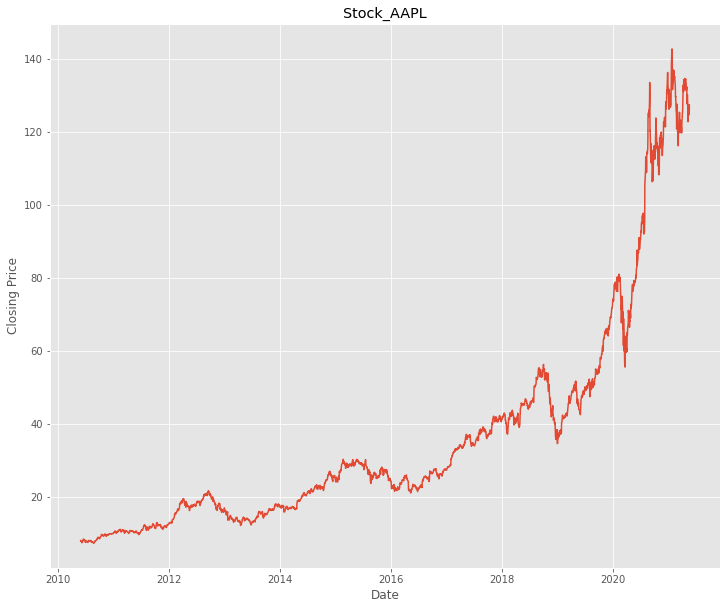

In [18]:
plt.figure(figsize=(12,10))
plt.plot(df['Date'],df['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Stock_AAPL')


In [19]:
df.shape

(2763, 8)

In [20]:
stock_df.columns=['ds','y']
stock_df.head()

,ds,y
0,2010-06-01,8.010303
1,2010-06-02,8.106121
2,2010-06-03,8.080631
3,2010-06-04,7.860740
4,2010-06-07,7.706572


In [22]:
from fbprophet import Prophet
prophet=Prophet()
prophet.fit(stock_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [33]:
future_df=prophet.make_future_dataframe(periods=365)
future_df

,ds
0,2010-06-01
1,2010-06-02
2,2010-06-03
3,2010-06-04
4,2010-06-07
...,...
3123,2022-05-16
3124,2022-05-17
3125,2022-05-18
3126,2022-05-19


In [34]:
forecast=prophet.predict(future_df)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-06-01,7.267102,0.352520,11.345502,7.267102,7.267102,-1.182728,-1.182728,-1.182728,-0.103357,-0.103357,-0.103357,-1.079371,-1.079371,-1.079371,0.0,0.0,0.0,6.084374
1,2010-06-02,7.278259,0.908024,11.640101,7.278259,7.278259,-1.137491,-1.137491,-1.137491,-0.095170,-0.095170,-0.095170,-1.042320,-1.042320,-1.042320,0.0,0.0,0.0,6.140768
2,2010-06-03,7.289415,0.605872,11.624016,7.289415,7.289415,-1.142919,-1.142919,-1.142919,-0.133518,-0.133518,-0.133518,-1.009401,-1.009401,-1.009401,0.0,0.0,0.0,6.146496
3,2010-06-04,7.300572,0.529445,11.746917,7.300572,7.300572,-1.198377,-1.198377,-1.198377,-0.217466,-0.217466,-0.217466,-0.980912,-0.980912,-0.980912,0.0,0.0,0.0,6.102195
4,2010-06-07,7.334043,1.139106,11.295182,7.334043,7.334043,-1.058676,-1.058676,-1.058676,-0.135023,-0.135023,-0.135023,-0.923653,-0.923653,-0.923653,0.0,0.0,0.0,6.275367


In [35]:
final=forecast[['ds','yhat']]

Text(0.5, 1.0, 'Forecast for 1 year')

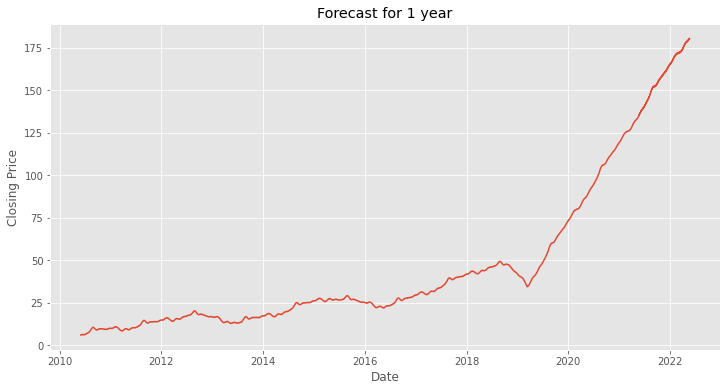

In [43]:
plt.figure(figsize=(12,6))
plt.plot(final['ds'],final['yhat'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Forecast for 1 year')